In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

### Linear Regression

##### House Price Prediction

In [2]:
data=pd.read_csv("homeprices.csv")
data

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [3]:
price=data['price']
area=data['area']

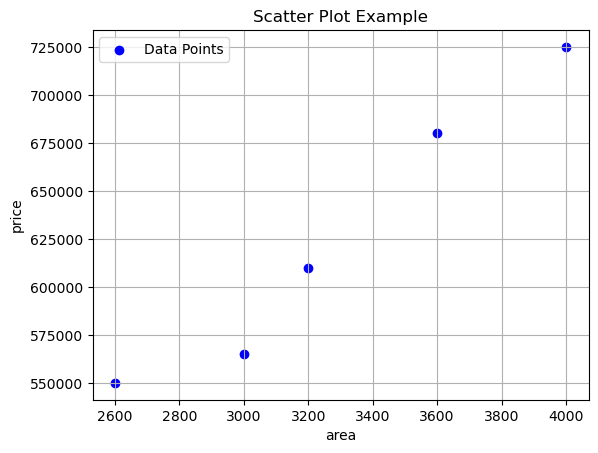

In [4]:
plt.scatter(area, price, color='blue', label='Data Points')
plt.title('Scatter Plot Example')
plt.xlabel('area')
plt.ylabel('price')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
model=linear_model.LinearRegression()

In [6]:
model.fit(data[['area']],data.price)

LinearRegression()

In [7]:
input_val=np.array([[3200]])

In [8]:
model.predict(input_val)

D:\Anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([615136.98630137])

#### y=mX + c

##### based on input data model calcuates coefficient m and intercept c

Coefficient

In [9]:
model.coef_

array([135.78767123])

Intercept

In [10]:
model.intercept_

180616.43835616432

Prediction new Y =m*(new_input) + c

In [11]:
180616.43835616432 + 135.78767123*3200

615136.9862921643

In [12]:
df=pd.read_csv("area_p.csv")
df

,area
0,1000
1,1500
2,1655
3,2040
4,3456
5,4560


In [13]:
model.predict(df[['area']])

array([316404.10958904, 384297.94520548, 405345.03424658, 457623.28767123,
       649898.63013699, 799808.21917808])

Text(0, 0.5, 'Predicted Price')

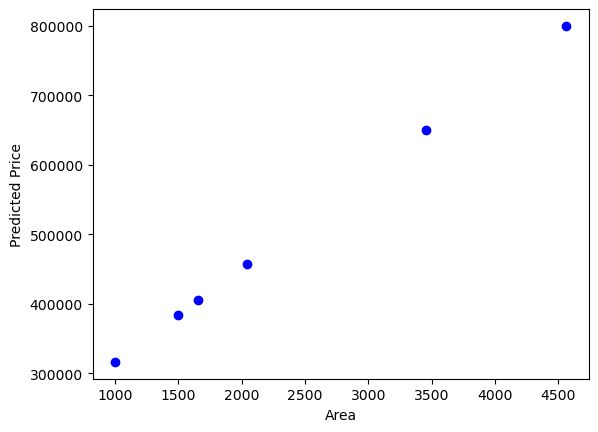

In [14]:
plt.scatter(df['area'], model.predict(df[['area']]), color='blue', label='Data Points')
plt.xlabel('Area')
plt.ylabel('Predicted Price')

In [15]:
df['predicted_prices']=model.predict(df[['area']])

In [16]:
df

,area,predicted_prices
0,1000,316404.109589
1,1500,384297.945205
2,1655,405345.034247
3,2040,457623.287671
4,3456,649898.630137
5,4560,799808.219178


In [17]:
df.to_csv('predicted_area.csv')

Train Test Method

In [18]:
X=df['area']
y=df['predicted_prices']

In [19]:
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42 )

In [20]:
X_train

5    4560
2    1655
4    3456
3    2040
Name: area, dtype: int64

In [21]:
X_test

0    1000
1    1500
Name: area, dtype: int64

In [22]:
input_val=X_test.values.reshape(-1,1)

In [23]:
y_train

5    799808.219178
2    405345.034247
4    649898.630137
3    457623.287671
Name: predicted_prices, dtype: float64

In [24]:
y_test

0    316404.109589
1    384297.945205
Name: predicted_prices, dtype: float64

In [25]:
model.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression()

In [26]:
y_predict=model.predict(X_test.values.reshape(-1,1))

In [27]:
y_predict

array([316404.10958904, 384297.94520548])

In [28]:
y_predict=model.predict(np.array([[1025]]))

In [29]:
y_predict

array([319798.80136986])

We will train model where we have multiple independernt varibales. 
Also we will be exploring how to convert catogorical variables into numerical.

### Multiple Variable LR

In [37]:
mlr_data=pd.read_csv('50_Startups.csv')

In [38]:
mlr_data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [39]:
mlr_data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [40]:
mlr_model=linear_model.LinearRegression()

In [41]:
# mlr_model.fit(mlr_data[['R&D Spend','Administration','Marketing Spend']],mlr_data['Profit'])

As State column is categorial need to convert into numeriacl using one hot encodding

In [42]:
dummies=pd.get_dummies(mlr_data['State'])

In [43]:
dummies

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [44]:
new_data=pd.concat([mlr_data,dummies],axis=1)

In [45]:
new_data

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0
5,131876.90,99814.71,362861.36,New York,156991.12,0,0,1
6,134615.46,147198.87,127716.82,California,156122.51,1,0,0
7,130298.13,145530.06,323876.68,Florida,155752.60,0,1,0
8,120542.52,148718.95,311613.29,New York,152211.77,0,0,1
9,123334.88,108679.17,304981.62,California,149759.96,1,0,0


In [46]:
mlr_model.fit(new_data[['R&D Spend','Administration','Marketing Spend','California','Florida','New York']],new_data['Profit'])

LinearRegression()

In [47]:
mlr_model.coef_

array([ 8.06023114e-01, -2.70043196e-02,  2.69798610e-02, -5.23005912e+01,
        1.46488202e+02, -9.41876104e+01])

In [48]:
mlr_model.intercept_

50177.6444228509

In [49]:
mlr_model.predict(np.array([[542,51734,0,0,0,1]]))

D:\Anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([49123.27987121])

#### Train and Test Data

In [50]:
X=new_data.drop(['Profit','State'],axis=1)
y=new_data['Profit']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the entire pipeline (including preprocessing) on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [52]:
y_pred

array([126362.87908255,  84608.45383633,  99677.49425146,  46357.46068582,
       128750.48288505,  50912.41741878, 109741.35032702, 100643.24281647,
        97599.27574593, 113097.42524431])

In [53]:
model.predict(np.array([[542,51734,0,0,0,1]]))

D:\Anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([50913.0065464])

In [54]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)


In [55]:
r_squared

0.8987266414329449

1.An R-squared value of 0.89 indicates a strong performance for a linear regression model. 
R-squared, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features)
2.R-squared ranges from 0 to 1, where 1 indicates that the model explains all the variability of the response data around its mean.
3.An R-squared value closer to 1 suggests that the model fits the data well, with a high proportion of the variance explained by the independent variables.
4.Conversely, an R-squared value closer to 0 indicates that the model does not explain much of the variability in the dependent variable and may not fit the data well.
